In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib


# Random forest #####################################

from sklearn.model_selection import train_test_split,cross_val_score,  GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

######################################################



from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
import os
from sklearn import metrics

In [101]:
os.environ['CUDA_DEVICE_ORDER']    ='PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1,2,3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [102]:
df = pd.read_csv("data_opt_Feline_clean.csv", header = 0)
df.head()

,Unnamed: 0,ID,Fe/H,T,Spec_Type,logG,3.636,3.6361,3.6362,3.6363,...,3.647,3.6471,3.6472,3.6473,3.6474,3.6475,3.6476,3.6477,3.6478,3.6479
0,0,299493250387961856,-1.114146,8123.4950,A0,4.231899,0.727069,0.659317,0.698580,0.753081,...,0.906805,0.920526,0.845230,0.824348,0.826020,0.900767,0.934351,0.823357,0.814464,0.881975
1,1,299497098678659072,0.022925,6082.7534,F2,3.811555,0.710345,0.673832,0.688650,0.774810,...,0.781177,0.810640,0.878742,0.916780,0.959738,0.902997,0.834681,0.787898,0.783533,0.840650
2,2,299498198190286848,-0.956672,5824.9960,G2,3.762244,0.767890,0.745628,0.713973,0.716306,...,0.870743,0.903982,0.911388,0.920946,0.981157,1.000000,0.974021,0.946377,0.872897,0.835844
3,3,299500672091449344,-0.086240,6894.1313,F5,4.002970,0.873480,0.830938,0.788394,0.822818,...,0.887271,0.889910,0.929657,0.977077,1.000000,0.981194,0.943684,0.907632,0.870985,0.870356
4,4,299501771603077120,-2.075622,6292.1630,F5,3.642724,0.946972,0.927313,0.927848,0.939332,...,0.966774,0.954011,0.966556,0.954604,0.941863,0.969388,0.972256,0.950652,0.959544,0.959670


In [103]:
X = df.drop(["ID", "Fe/H", "T", "Spec_Type", "logG"], axis = 1) 
Y_temp = df["T"] 
Y_fe_h = df["Fe/H"] 
Y_g = df["logG"] 


X_train, X_test, y_T_train, y_T_test = train_test_split(X, Y_temp, test_size=0.40, random_state=42)

Y_fe_h = Y_fe_h.multiply(1000)
X_train, X_test, y_fe_h_train, y_fe_h_test = train_test_split(X, Y_fe_h, test_size=0.40, random_state=42)


X_train, X_test, y_g_train, y_g_test = train_test_split(X, Y_g, test_size=0.40, random_state=42)

possible_Y = {1 : y_T_train, 2 : y_fe_h_train, 3 : y_g_train}
possible_test_Y = {1 : y_T_test, 2 : y_fe_h_test, 3 : y_g_test}

y_train = possible_Y[2]       # Seleccionar número para elegir qué característica predecir. 
y_test = possible_test_Y[2]   # Seleccionar número para elegir qué característica predecir.

In [20]:
param_grid = {
  'bootstrap':[True], # Hay que fijar esta variable en "True" porque si no siempre va a salir "False", porque eso le permite hacer overfitting. 
  'ccp_alpha':[0.0,0.5,1.0,1.5,2.0],
  'criterion':['mse', 'mae'],
  'max_depth':[None, 5, 8, 15, 20],
  'max_features':['auto', 'sqrt', 'log2'],
  'max_leaf_nodes':[None, 20, 50, 100, 150],
  'max_samples':[None, 1, 0.2, 0.4, 0.6, 0.8],
  'min_impurity_decrease':[0.0,0.5,1.0,1.5,2.0],
  'min_samples_leaf':[2,3,4,5],
  'min_samples_split':[2,3,4,5,6],
  'min_weight_fraction_leaf':[0.0,0.5],
  'oob_score':[True, False],
  'random_state':[42],
  'n_estimators':[100],
  'verbose':[1, 5, 20, 50, 100],
  'warm_start':[True, False]
  }

In [21]:
def randomized_search():
    rf = RandomForestRegressor()
    rscv = RandomizedSearchCV(rf, param_grid)
    search = rscv.fit(X_train, y_train)
    best_params = search.best_params_
    print(best_params)
    #The best parameters are {'warm_start': False, 'verbose': 50, 'random_state': 42, 'oob_score': False, 'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 6, 'min_samples_leaf': 3, 'min_impurity_decrease': 1.5, 'max_samples': 0.8, 'max_leaf_nodes': 20, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'mae', 'ccp_alpha': 2.0, 'bootstrap': True}

In [ ]:
def best_features_runner():  
    best_params = {'warm_start': False, 'verbose': 50, 'random_state': 42, 'oob_score': False, 'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 6, 'min_samples_leaf': 3, 'min_impurity_decrease': 1.5, 'max_samples': 0.8, 'max_leaf_nodes': 20, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'mae', 'ccp_alpha': 2.0, 'bootstrap': True}
    rf_best = RandomForestRegressor()
    rf_best.set_params(**best_params)
    rf_best.fit(X_train, y_train)
    
    y_pred = rf_best.predict(X_test)
    
    # Ver características más importantes:
    important_features_dict = {}
    for idx, val in enumerate(rf_best.feature_importances_):
        important_features_dict[idx] = val
    
    important_features_list = sorted(important_features_dict, key=important_features_dict.get, reverse=True)
    print(important_features_list) # Los primeros valores de la lista son los menos importantes. 
    #################################
    joblib.dump(rf_best,'./saved_models/' + 'rf_opt_Feline.joblib')
    print("The mean square error is ", mean_squared_error(y_test, y_pred), " and R^2 is ", r2_score(y_test, y_pred), ".")
    
best_features_runner()

In [97]:
Model = joblib.load('./saved_models/' + 'rf_opt_Feline.joblib')
y_pred = Model.predict(X_test)
y_pred = pd.Series(y_pred)
y_pred = y_pred.divide(1000)
y_true = y_test.divide(1000)
#y_true = y_test

print([type(y_pred),type(y_true),y_pred.shape,y_true.shape])

ae = np.mean(abs(y_true[:]-y_pred[:]))
pe = np.mean(abs(y_true[:]-y_pred[:]) / y_true[:])
rmse = np.sqrt(metrics.mean_squared_error(y_true[:], y_pred[:]))
resid_mean = np.mean(y_true[:]-y_pred[:])
resid_sd = np.std(y_true[:]-y_pred[:])


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [98]:
print(ae)
print(pe)
print(rmse)
print(resid_mean)
print(resid_sd)

0.6113258108427599
-1.2020168953669161
0.4400837089849231
-0.15829738830797785
0.7715196550894954


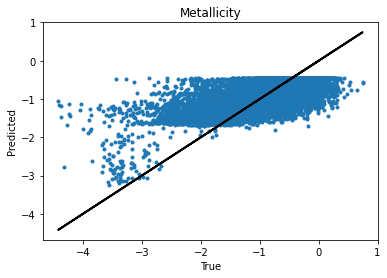

In [99]:
plt.plot(y_true,y_pred,'.')
plt.plot(y_true, y_true, color='k', linestyle='-', linewidth=2)
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('Metallicity')
plt.show()